# Coursera Capstone Project: Battle of Neighborhoods
Introduction
Munich is the capital and most populous city of Bavaria, the second most populous German federal state. With a population of around 1.5 million,it is the third-largest city in Germany, after Berlin and Hamburg, while being the most densely populated municipality in Germany (4,500 people per km²). The city's metropolitan region is home to 6 million people and it is divided into 25 boroughs.

The city is a global centre of art, science, technology, finance, publishing, culture, innovation, education, business, and tourism and enjoys a very high standard and quality of living, reaching first in Germany and third worldwide according to the 2018 Mercer survey, and being rated the world's most liveable city by the Monocle's Quality of Life Survey 2018. However, the city is also known for its thriving multicultural gastronomy that is represented by various ethnic cuisines along with the traditional Bavarian cuisine.

1. Business Problem
Some of the factors that are considered to play a significant role in the success of a restaurant are high traffic areas where consumers go for shopping and entertainment, where there are many shops and businesses and also places of touristic interest. However, there are also more factors that should be taken into account, for instance, the prices of property in each area, the population of the inhabitants as well as the presence of competitors ,that can play a decisive role in the success of a business in this field. Bearing all these in mind, the goal of this study is to suggest a location to anyone who is planning to open a Greek restaurant, that minimizes the risks of such an investment. It is known that Greek cuisine is very close both to the Italian and the Turkish cuisine. Bearing this in mind, the presence of Greek, Italian and Turkish restaurants in a specific neighborhood can, on the one hand, be an index of the preference of the inhabitants on this type of cuisine while on the other hand, it indicates that there will be heavy competition.

The focus of this project is to analyze the existence of restaurants in general and more specifically the existance of Greek restaurants in the city of Munich and propose a suitable location for anyone planning to open a new Greek restaurant.
2. Data Preparation
Data Requirements
The names of the 25 boroughs that Munich is divided in, along with the number of inhabitants and their total area.

Source: www.opengov-muenchen.de
The coordinates of every borough.

Source: The geocoder library
Information about the venues and more specifically the restaurants in each borough.

Source: Foursquare API
The ratings of restaurants.

Source: Foursquare API

Data cleaning
The data scraped from the Internet are always not in a convenient form so a few adaptations will be needed. There will be a detailed explanation of all the changes that will be conducted in every situation.

Approach
Collect the Munich Borough names from www.opengov-muenchen.de
Use the FourSquare API to find the venues for each borough.
Focus on the restaurants of each type in every borough.
Firstly, the overall existence of restaurants will be checked in order to spot possible suitable locations.
Secondly, I will focus on Greek, Italian and Turkish restaurants to get an idea of the existing competition.
Use the Foursquare API to compare the ratings of each Greek restaurant.
Visualize the results with maps and charts.

In [1]:
import numpy as np # library to handle data in a vectorized manner
!pip install geocoder
import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
!pip install folium
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates
import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

     |████████████████████████████████| 102kB 8.4MB/s ta 0:00:011
     |████████████████████████████████| 102kB 9.1MB/s ta 0:00:011


# 2.1 Scraping the borough names table
Tο begin with, after searching the net I managed to find available data both on WIkipedia and www.opengov-muenchen.de. However, those found in the second case contained more information so I decided to work with them. The first step was to use pd.read_csv in order to store them in a Dataframe.

In [2]:
munich = pd.read_csv('https://www.opengov-muenchen.de/dataset/e3f5dbd2-39cc-40cd-bc91-4bb49a0b1802/resource/a641ce6a-4e01-4f4b-9976-1ae6a47e3762/download/jt140102.csv')
munich

,stadtbezirk,einwohner,flaeche,einwohnerdichte,anteil_an_gesamtbevoelkerung
0,1 Altstadt - Lehel,20422,314.57,65.0,1.39
1,2 Ludwigsvorstadt - Isarvorstadt,50620,440.14,115.0,3.46
2,3 Maxvorstadt,51642,429.79,120.0,3.53
3,4 Schwabing West,65892,436.30,151.0,4.50
4,5 Au - Haidhausen,59752,421.96,142.0,4.08
5,6 Sendling,39953,393.87,101.0,2.73
6,7 Sendling - Westpark,55405,781.45,71.0,3.78
7,8 Schwanthalerhöhe,29663,207.02,143.0,2.02
8,9 Neuhausen - Nymphenburg,95906,1291.45,74.0,6.55
9,10 Moosach,51537,1109.36,46.0,3.52


Now the data need be cleaned and formed. There are some columns with information that are not relevant so i chose to exclude them. In addition, since the column names are in German I renamed them with terms in English. Lastly, the last row did not contain any data so i deleted it as well.

In [3]:
munich.drop(munich.index[[25]],axis=0, inplace=True)

munich.rename(columns={'stadtbezirk':'Borough', 'einwohner':'Inhabitants','flaeche':'Area'}, inplace=True)

munich.drop(columns=['einwohnerdichte','anteil_an_gesamtbevoelkerung'], inplace=True)

munich

,Borough,Inhabitants,Area
0,1 Altstadt - Lehel,20422,314.57
1,2 Ludwigsvorstadt - Isarvorstadt,50620,440.14
2,3 Maxvorstadt,51642,429.79
3,4 Schwabing West,65892,436.30
4,5 Au - Haidhausen,59752,421.96
5,6 Sendling,39953,393.87
6,7 Sendling - Westpark,55405,781.45
7,8 Schwanthalerhöhe,29663,207.02
8,9 Neuhausen - Nymphenburg,95906,1291.45
9,10 Moosach,51537,1109.36


# 2.2 Using Geopy Client to get the coordinates of each borough
Now I will define a function that, with the help of geocoder, will return the coordinates of every borough. Then I will add them as new columns to my existing Dataframe.¶

In [4]:
def get_latlng(borough):

    lat_lng_coords = None
   
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, Munich, Germany'.format(borough))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [5]:
coords = [ get_latlng(borough) for borough in munich["Borough"].tolist() ]
coords

[[48.143873521207276, 11.584591789121971],
 [48.132250000000056, 11.558470000000057],
 [48.14582000000007, 11.565170000000023],
 [48.159140000000036, 11.585330000000056],
 [48.12930000000006, 11.599210000000028],
 [48.11812000000003, 11.540440000000046],
 [48.11805000000004, 11.51607000000007],
 [48.133830000000046, 11.540140000000065],
 [48.15873000000005, 11.50881000000004],
 [48.25754999567641, 11.54473999121447],
 [48.185209980320735, 11.568119969017857],
 [48.159140000000036, 11.585330000000056],
 [48.13999000000007, 11.60361000000006],
 [48.13132000000007, 11.632090000000062],
 [48.125380000000064, 11.663370000000043],
 [48.115680000000054, 11.614720000000034],
 [48.11091000000005, 11.595020000000034],
 [48.11588000000006, 11.57015000000007],
 [48.08328000000006, 11.484480000000076],
 [48.115350000000035, 11.479380000000049],
 [48.16444000000007, 11.475240000000042],
 [48.17910000000006, 11.407110000000046],
 [48.189940000000036, 11.460290000000043],
 [48.21462000000008, 11.53488

In [6]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

munich['Latitude'] = df_coords['Latitude']
munich['Longitude'] = df_coords['Longitude']

print(munich.shape)
munich

(25, 5)


,Borough,Inhabitants,Area,Latitude,Longitude
0,1 Altstadt - Lehel,20422,314.57,48.143874,11.584592
1,2 Ludwigsvorstadt - Isarvorstadt,50620,440.14,48.132250,11.558470
2,3 Maxvorstadt,51642,429.79,48.145820,11.565170
3,4 Schwabing West,65892,436.30,48.159140,11.585330
4,5 Au - Haidhausen,59752,421.96,48.129300,11.599210
5,6 Sendling,39953,393.87,48.118120,11.540440
6,7 Sendling - Westpark,55405,781.45,48.118050,11.516070
7,8 Schwanthalerhöhe,29663,207.02,48.133830,11.540140
8,9 Neuhausen - Nymphenburg,95906,1291.45,48.158730,11.508810
9,10 Moosach,51537,1109.36,48.257550,11.544740


# 3 Methodology and Exploratory Data Analysis
Data Analysis and Location Data:

Foursquare will be used to explore the boroughs of Munich.
Data manipulation and analysis.
Identifying the best options by creating and exploring subsets.
Visualization:
Analysis and plotting visualizations.
Data visualization using various maps.
The dataframe now includes all the information that I will need so i will create a map of Munich with the boroughs superimposed on top in order to get a picture of the area and gain a better understanding. To achieve this, i will firstly use geolocator to obtain the geographical coordinates of Munich and then i will use Folium to plot the map indicating the location of each borough.

In [7]:
address = 'Munich, Germany'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Munich, Germany {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Munich, Germany 48.1371079, 11.5753822.


In [8]:
map_mun = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(munich['Latitude'], munich['Longitude'], munich['Borough']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mun)  
    
map_mun

# Using Foursquare to get the venues
Now I will use the Foursquare API to get the venues of each borough, analyze them and extract some useful information.

In [9]:
CLIENT_ID = 'AGDEF3A0QWUSFT42ZADUISG3GEYZPMAXJEEMDGUUIHIHEYTX' 
CLIENT_SECRET = 'PITK5R0MRCPOH3AEJROHH3X5CBFKN11P2PHMX4PPULCT1IG1' 
VERSION = '20180604'

def getNearbyVenues(names, latitudes, longitudes):
    radius=3000
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [10]:
munich_venues = getNearbyVenues(names=munich['Borough'],
                                   latitudes=munich['Latitude'],
                                   longitudes=munich['Longitude']
                                  )

  1 Altstadt - Lehel
  2 Ludwigsvorstadt - Isarvorstadt 
  3 Maxvorstadt
  4 Schwabing West
  5 Au - Haidhausen
  6 Sendling 
  7 Sendling - Westpark
  8 Schwanthalerhöhe
  9 Neuhausen - Nymphenburg
10 Moosach
11 Milbertshofen - Am Hart
12 Schwabing - Freimann
13 Bogenhausen
14 Berg am Laim 
15 Trudering - Riem
16 Ramersdorf - Perlach 
17 Obergiesing - Fasangarten
18 Untergiesing - Harlaching 
19 Thalkirchen - Obersendling - Forstenried -
     Fürstenried - Solln
20 Hadern 
21 Pasing - Obermenzing
22 Aubing - Lochhausen - Langwied
23 Allach - Untermenzing
24 Feldmoching - Hasenbergl 
25 Laim


In [11]:
munich_venues.head()

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,1 Altstadt - Lehel,48.143874,11.584592,Eisbachwelle,48.143532,11.587754,Surf Spot
1,1 Altstadt - Lehel,48.143874,11.584592,Die Goldene Bar,48.144107,11.586004,Cocktail Bar
2,1 Altstadt - Lehel,48.143874,11.584592,SEITZ Trattoria,48.141419,11.584902,Trattoria/Osteria
3,1 Altstadt - Lehel,48.143874,11.584592,Hofgarten,48.143053,11.579955,Garden
4,1 Altstadt - Lehel,48.143874,11.584592,Fräulein Grüneis,48.143715,11.589003,Snack Place


In [12]:
munich_venues.groupby('Borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Borough,,,,,,
1 Altstadt - Lehel,100,100,100,100,100,100
2 Ludwigsvorstadt - Isarvorstadt,100,100,100,100,100,100
3 Maxvorstadt,100,100,100,100,100,100
4 Schwabing West,100,100,100,100,100,100
5 Au - Haidhausen,100,100,100,100,100,100
6 Sendling,100,100,100,100,100,100
7 Sendling - Westpark,100,100,100,100,100,100
8 Schwanthalerhöhe,100,100,100,100,100,100
9 Neuhausen - Nymphenburg,100,100,100,100,100,100


Let's check how many different categories of venues there are

In [13]:
print('There are {} unique categories.'.format(len(munich_venues['Venue Category'].unique())))

There are 201 unique categories.


Lets also check if there are any other Greek Restaurants included

In [14]:
"Greek Restaurant" in munich_venues['Venue Category'].unique()

True

Now I will focus on Restaurants of all kinds

In [15]:
restos=munich_venues[munich_venues['Venue Category'].str.contains("Restaurant")].reset_index(drop=True)
restos.index=np.arange(1,len(restos)+1)
restos

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,1 Altstadt - Lehel,48.143874,11.584592,Liebighof im Lehel,48.141640,11.586470,German Restaurant
2,1 Altstadt - Lehel,48.143874,11.584592,La Stanza,48.139830,11.586984,Italian Restaurant
3,1 Altstadt - Lehel,48.143874,11.584592,The Italian Shot,48.148114,11.575081,Italian Restaurant
4,1 Altstadt - Lehel,48.143874,11.584592,Cotidiano,48.140202,11.570149,Restaurant
5,1 Altstadt - Lehel,48.143874,11.584592,Sababa,48.134748,11.577250,Falafel Restaurant
6,1 Altstadt - Lehel,48.143874,11.584592,Augustiner Klosterwirt,48.138649,11.572527,German Restaurant
7,1 Altstadt - Lehel,48.143874,11.584592,Gasthaus Isarthor,48.134928,11.583601,German Restaurant
8,1 Altstadt - Lehel,48.143874,11.584592,Gratitude Restaurant,48.150723,11.576171,Vegetarian / Vegan Restaurant
9,1 Altstadt - Lehel,48.143874,11.584592,Andechser am Dom,48.138302,11.573778,Bavarian Restaurant
10,1 Altstadt - Lehel,48.143874,11.584592,ZWICKL Gastlichkeit am Viktualienmarkt,48.135240,11.577249,German Restaurant


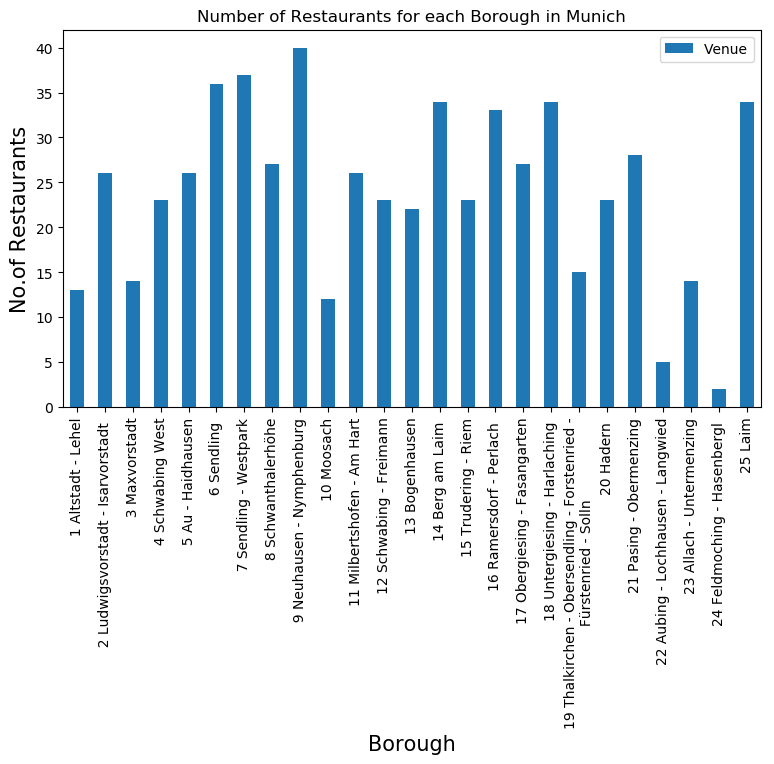

In [16]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Restaurants for each Borough in Munich')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Restaurants', fontsize=15)
#giving a bar plot
restos.groupby('Borough')['Venue'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

# The graph above illustrates that the Boroughs of Munich where the most restaurants are located are by descending order:
Sending-Westpark
Laim
Neuhausen-Nymphenburg
Berg am Laim
Ramersdorf-Perlach
Pasing-Obermenzing
As mentioned in the introduction, the existence of various types of venues like cafes, shops and businesses can play a decisive role in the success of a restaurant, therefore the amount of restaurants in these Boroughs is an indication that these conditions are fulfilled. Bearing this in mind, we will further investigate each borough and its venues by storing them in a new dataframe and locating the Top 10 venues in each borough.

In [17]:
munich_onehot = pd.get_dummies(munich_venues[['Venue Category']], prefix="", prefix_sep="")
munich_onehot['Borough'] = munich_venues['Borough'] 
fixed_columns = [munich_onehot.columns[-1]] + list(munich_onehot.columns[:-1])
munich_onehot = munich_onehot[fixed_columns]

munich_onehot.shape

(2184, 202)

In [18]:
munich_grouped = munich_onehot.groupby('Borough').mean().reset_index()
munich_grouped.head()

,Borough,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Arcade,Art Museum,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Stadium,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bistro,Boarding House,Bookstore,Bosnian Restaurant,Botanical Garden,Bowling Alley,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Stop,Café,Campground,Canal,Castle,Caucasian Restaurant,Chinese Restaurant,Church,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Convenience Store,Cretan Restaurant,Cultural Center,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Dog Run,Doner Restaurant,Drugstore,Electronics Store,Ethiopian Restaurant,Event Space,Fair,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Hawaiian Restaurant,Heliport,Hill,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hostel,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewish Restaurant,Juice Bar,Kebab Restaurant,Lake,Light Rail Station,Lounge,Malay Restaurant,Manti Place,Market,Martial Arts Dojo,Men's Store,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nature Preserve,Nightclub,Opera House,Organic Grocery,Outdoor Sculpture,Palace,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Plaza,Poke Place,Pool,Pub,Racetrack,Ramen Restaurant,Residential Building (Apartment / Condo),Restaurant,River,Rock Club,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shopping Mall,Shopping Plaza,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Surf Spot,Sushi Restaurant,Taco Place,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,1 Altstadt - Lehel,0.0,0.00,0.0,0.0,0.00,0.02,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.01,0.0,0.01,0.00,0.0,0.0,0.00,0.04,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.01,0.00,0.01,0.01,0.0,0.10,0.0,0.0,0.0,0.00,0.0,0.03,0.0,0.00,0.0,0.03,0.03,0.0,0.01,0.00,0.00,0.0,0.01,0.0,0.0,0.00,0.03,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.01,0.00,0.01,0.01,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.01,0.00,0.0,0.0,0.01,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.03,0.00,0.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.03,0.04,0.01,0.00,0.0,0.01,0.03,0.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.01,0.0,0.00,0.0,0.00,0.02,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.00,0.02,0.00,0.00,0.01,0.01,0.02,0.0,0.0,0.0,0.0,0.00,0.09,0.0,0.00,0.00,0.0,0.00,0.0,0.01,0.02,0.0,0.01,0.0,0.0,0.01,0.0,0.00,0.00,0.00,0.0,0.01,0.0,0.0,0.0,0.00,0.01,0.0,0.0,0.0,0.01,0.00,0.02,0.0,0.00,0.0,0.00,0.01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.02,0.00,0.01,0.01,0.00,0.01,0.0
1,2 Ludwigsvorstadt - Isarvorstadt,0.0,0.00,0.0,0.0,0.00,0.00,0.01,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.03,0.0,0.06,0.02,0.0,0.0,0.01,0.02,0.00,0.0,0.00,0.0,0.01,0.0,0.0,0.0,0.00,0.01,0.00,0.01,0.0,0.11,0.0,0.0,0.0,0.01,0.0,0.03,0.0,0.00,0.0,0.03,0.04,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.02,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.01,0.01,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.00,0.0,0.0,0.

Now lets find the 10 most common venues and store them in a new Dataframe

In [19]:
num_top_venues = 10

for hood in munich_grouped['Borough']:
    print("----"+hood+"----")
    temp = munich_grouped[munich_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----  1 Altstadt - Lehel----
                venue  freq
0                Café  0.10
1               Plaza  0.09
2   German Restaurant  0.04
3         Beer Garden  0.04
4      Ice Cream Shop  0.04
5              Church  0.03
6        Cocktail Bar  0.03
7  Italian Restaurant  0.03
8         Coffee Shop  0.03
9        Gourmet Shop  0.03


----  2 Ludwigsvorstadt - Isarvorstadt ----
                 venue  freq
0                 Café  0.11
1       Ice Cream Shop  0.06
2  Bavarian Restaurant  0.06
3                Hotel  0.05
4          Coffee Shop  0.04
5                Plaza  0.04
6           Restaurant  0.04
7   Italian Restaurant  0.04
8               Church  0.03
9    German Restaurant  0.03


----  3 Maxvorstadt----
               venue  freq
0               Café  0.13
1              Plaza  0.07
2              Hotel  0.07
3        Coffee Shop  0.05
4       Cocktail Bar  0.04
5     Ice Cream Shop  0.04
6  German Restaurant  0.03
7         Art Museum  0.03
8             Church  0.03
9 

In [20]:
# The venues are sorted in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [21]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
munich_venues_sorted = pd.DataFrame(columns=columns)
munich_venues_sorted['Borough'] = munich_grouped['Borough']

for ind in np.arange(munich_grouped.shape[0]):
    munich_venues_sorted.iloc[ind, 1:] = return_most_common_venues(munich_grouped.iloc[ind, :], num_top_venues)

munich_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1 Altstadt - Lehel,Café,Plaza,Ice Cream Shop,German Restaurant,Beer Garden,Church,Italian Restaurant,Coffee Shop,Cocktail Bar,Gourmet Shop
1,2 Ludwigsvorstadt - Isarvorstadt,Café,Ice Cream Shop,Bavarian Restaurant,Hotel,Coffee Shop,Plaza,Italian Restaurant,Restaurant,Bar,Cocktail Bar
2,3 Maxvorstadt,Café,Hotel,Plaza,Coffee Shop,Cocktail Bar,Ice Cream Shop,Church,Department Store,German Restaurant,Art Museum
3,4 Schwabing West,Café,German Restaurant,Plaza,Bar,Italian Restaurant,Park,Art Museum,Cocktail Bar,Ice Cream Shop,Restaurant
4,5 Au - Haidhausen,Café,German Restaurant,Plaza,Cocktail Bar,Coffee Shop,Beer Garden,Gourmet Shop,Hotel,Italian Restaurant,Steakhouse
5,6 Sendling,Café,Italian Restaurant,Ice Cream Shop,Greek Restaurant,German Restaurant,Park,Vietnamese Restaurant,Hotel,Asian Restaurant,Bar
6,7 Sendling - Westpark,Café,Italian Restaurant,German Restaurant,Greek Restaurant,Ice Cream Shop,Gym / Fitness Center,Asian Restaurant,Park,Hotel,Bakery
7,8 Schwanthalerhöhe,Café,Ice Cream Shop,Hotel,German Restaurant,Italian Restaurant,Bavarian Restaurant,Bar,Trattoria/Osteria,Asian Restaurant,Coffee Shop
8,9 Neuhausen - Nymphenburg,German Restaurant,Italian Restaurant,Café,Hotel,Plaza,Beer Garden,Organic Grocery,Bakery,Taverna,Park
9,10 Moosach,German Restaurant,Palace,Supermarket,Hotel,Greek Restaurant,Park,Soccer Field,Gym / Fitness Center,Drugstore,Italian Restaurant


After this procedure, it is now clear that all the boroughs that we spotted before have a decent amount of other types of venues that can be an attraction for many people, therefore they can all be a good location for someone to open a new restaurant. Nevertheless, we will try to make an even more specified propotition.¶
Now it is time to take a look at the existence of competitors, more precisely Italian, Turkish and other Greek restaurants.

In [22]:
antagon=restos[restos['Venue Category'].str.contains("Greek Restaurant|Italian Restaurant|Turkish Restaurant|Trattoria/Osteria")].reset_index(drop=True)
antagon.index=np.arange(1,len(antagon)+1)
antagon

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,1 Altstadt - Lehel,48.143874,11.584592,La Stanza,48.139830,11.586984,Italian Restaurant
2,1 Altstadt - Lehel,48.143874,11.584592,The Italian Shot,48.148114,11.575081,Italian Restaurant
3,1 Altstadt - Lehel,48.143874,11.584592,Farina im Backspielhaus,48.148904,11.599921,Italian Restaurant
4,2 Ludwigsvorstadt - Isarvorstadt,48.132250,11.558470,Mimmo e Co.,48.127702,11.556617,Italian Restaurant
5,2 Ludwigsvorstadt - Isarvorstadt,48.132250,11.558470,Melina Merkouri,48.127694,11.561698,Greek Restaurant
6,2 Ludwigsvorstadt - Isarvorstadt,48.132250,11.558470,Hey Luigi!,48.128838,11.568269,Italian Restaurant
7,2 Ludwigsvorstadt - Isarvorstadt,48.132250,11.558470,Pepenero,48.129735,11.569964,Italian Restaurant
8,2 Ludwigsvorstadt - Isarvorstadt,48.132250,11.558470,Il Piccolo Principe,48.123847,11.565488,Italian Restaurant
9,3 Maxvorstadt,48.145820,11.565170,The Italian Shot,48.148114,11.575081,Italian Restaurant
10,3 Maxvorstadt,48.145820,11.565170,Kalypso,48.157322,11.571447,Greek Restaurant


To get a better understanding I will visualize the results as a bar chart

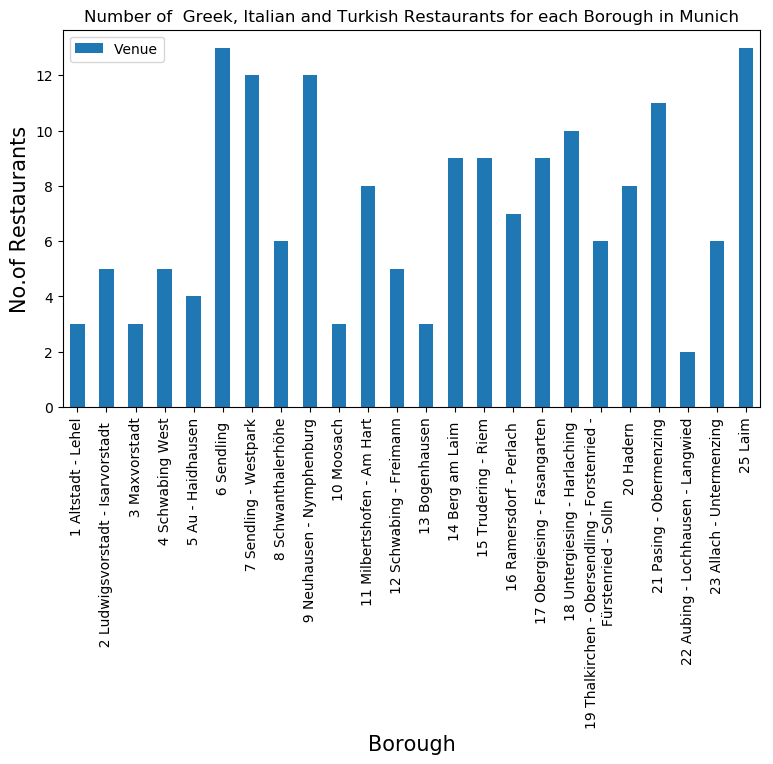

In [23]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of  Greek, Italian and Turkish Restaurants for each Borough in Munich')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Restaurants', fontsize=15)
#giving a bar plot
antagon.groupby('Borough')['Venue'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

# The bar chart indicates that the vast majority of antagonistic restaurants are situated in the boroughs:
Sending-Westpark
Laim
Neuhausen-Nympenburg
Milbertshofen-Am Hart
Berg am Laim
Pasing-Obermenzing
Lets create a map indicating where these boroughs are located.

In [24]:
final=munich[munich['Borough'].str.contains("7 Sendling - Westpark|25 Laim|9 Neuhausen - Nymphenburg|14 Berg am Laim|16 Ramersdorf - Perlach|21 Pasing - Obermenzing")].reset_index(drop=True)
final.index=np.arange(1,len(final)+1)
final

,Borough,Inhabitants,Area,Latitude,Longitude
1,7 Sendling - Westpark,55405,781.45,48.11805,11.51607
2,9 Neuhausen - Nymphenburg,95906,1291.45,48.15873,11.50881
3,14 Berg am Laim,43068,631.46,48.13132,11.63209
4,16 Ramersdorf - Perlach,108244,1989.50,48.11568,11.61472
5,21 Pasing - Obermenzing,70783,1649.78,48.16444,11.47524
6,25 Laim,54030,528.59,48.13545,11.50137


In [25]:
map_final = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(final['Latitude'], final['Longitude'], final['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_final)  
    
map_final


4. Results and Discussion
As expected the competitive restaurants are also located in the boroughs that are more preferable to the owners of restaurants of every other type, so they can all be considered as good choices. In addition, the criteria that mark a promising location are met since there are various and diverse venues that can attract many people. To sum up, it is clear that
Sending-Westpark
Laim
Neuhausen-Nymphenburg
Berg am Laim
Ramersdorf-Perlach
Pasing-Obermenzing
can all be considered as suitable location for anyone intending to start a new Greek restaurant.
However, despite the fact that "Ramersdorf-Perlach" is a very popular location for restaurants, we found out that there are less antagonistic restaurants in that area, so it is valued as the best choice for a new Greek restaurant. To support this result even further, it is also the most populous borough in Munich which is very possitive as there are more possible customers. Moreover, it is located close to the centre of the city and as a result it can be easily accessible.
5. Conclusion
To conclude this project, the way this analysis was conducted focuses on simplicity and the methodology that was taught during the courses. I also took into account my personal knowledge on the field of gastronomy, as well as my familiarity with the city of Munich. I had in mind to use the clustering algorythms but in the end i realized that in the way the research was conducted, they would make the procedure more complex without having much to offer. What could be seen as a drawback is the accuracy of the data that were used along with the fact that more factors could have been taken into account . However, the data has helped to get a better insight of the market of Munich in this field and could assist anyone's effort to spot a location in order to establish a new Greek restaurant.